In [4]:
# Import dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-35.322045219645396 -19.085549658658437
25.731604679285283 -95.12279327584396
44.12434683329772 -47.42947751479372
-10.353487923527624 167.61052871413926
-70.53349363435967 133.73908311942768
38.6837056226791 148.71632874588994
-28.837958009916846 -75.71975015450876
-76.76511368755015 -93.60434915572785
-60.40216936130338 113.1502748167897
17.323137380660484 -51.25605465368017
-76.37089922835321 -13.641480104346329
33.025934180699906 -87.4922743327016
50.97765733311891 -27.535124515604764
-3.0912431880356195 128.62665457150388
62.54207988972806 70.17781374512103
28.35789995269583 -20.932192295320817
44.82467428012717 -80.06976834829703
-29.91409901286184 -140.2050980732556
-30.30620703999665 154.32919573397078
-1.6590024412973747 143.42720629124221
10.98722055034662 54.959685021452344
-64.65577764682797 -51.357832165753734
62.39865816487654 50.383056212624695
59.07082342909385 70.00451864770875
-43.96491798138378 169.9576687105113
-62.894698705639925 78.7570400070228
63.14529595062527 

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

cities

['jamestown',
 'brownsville',
 'torbay',
 'lata',
 'new norfolk',
 'nemuro',
 'coquimbo',
 'punta arenas',
 'albany',
 'bathsheba',
 'cape town',
 'tuscaloosa',
 'lagoa',
 'amahai',
 'gornopravdinsk',
 'los llanos de aridane',
 'midland',
 'rikitea',
 'coffs harbour',
 'aitape',
 'bargal',
 'ushuaia',
 'aykino',
 'turtas',
 'fairlie',
 'busselton',
 'pangnirtung',
 'kieta',
 'chokurdakh',
 'wau',
 'srandakan',
 'bambous virieux',
 'bluff',
 'lebu',
 'port elizabeth',
 'illoqqortoormiut',
 'tarauaca',
 'whitehorse',
 'bratslav',
 'mataura',
 'lusaka',
 'khatanga',
 'attawapiskat',
 'omboue',
 'ilo',
 'aklavik',
 'sibolga',
 'qaanaaq',
 'egvekinot',
 'touros',
 'faanui',
 'puerto escondido',
 'pontianak',
 'miandrivazo',
 'ambilobe',
 'safaga',
 'abiy adi',
 'ribeira grande',
 'georgetown',
 'bredasdorp',
 'inuvik',
 'tabuk',
 'leshukonskoye',
 'lakes entrance',
 'vaitupu',
 'tambacounda',
 'mehamn',
 'bubaque',
 'carnarvon',
 'ostersund',
 'bandarbeyla',
 'hami',
 'husavik',
 'santa ros

In [10]:
# Import the time library and the datetime module from the datetime library.

import time

from datetime import datetime

In [11]:
import requests

from config import weather_api_key

In [12]:
# Build the OpenWeather API request URL.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data. 

city_data = []

# Print the beginning of the logging.

print('Beginning Data Retrieval       ')

print('------------------------')

# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in our list.

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
    # Create endpopint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    
# Run and API request for each of the cities.

    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the data to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data_list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        
        pass

# Indicate that Data Loading is complete.

print('-------------------------------')

print('Data Retrieval Complete        ')

print('-------------------------------')

Beginning Data Retrieval       
------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | brownsville
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | nemuro
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | bathsheba
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | tuscaloosa
Processing Record 13 of Set 1 | lagoa
Processing Record 14 of Set 1 | amahai
Processing Record 15 of Set 1 | gornopravdinsk
Processing Record 16 of Set 1 | los llanos de aridane
Processing Record 17 of Set 1 | midland
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | coffs harbour
Processing Record 20 of Set 1 | aitape
Processing Record 21 of Set 1 | bargal
City not found. Skipping...
Processing Record 22 of Set 1 | ushuaia
Proce

Processing Record 37 of Set 4 | thompson
Processing Record 38 of Set 4 | nanortalik
Processing Record 39 of Set 4 | westport
Processing Record 40 of Set 4 | taoudenni
Processing Record 41 of Set 4 | east london
Processing Record 42 of Set 4 | pointe michel
Processing Record 43 of Set 4 | otradnoye
Processing Record 44 of Set 4 | hay river
Processing Record 45 of Set 4 | norfolk
Processing Record 46 of Set 4 | anchorage
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | verkhniy avzyan
Processing Record 50 of Set 4 | saskylakh
Processing Record 1 of Set 5 | kaputa
Processing Record 2 of Set 5 | manicore
Processing Record 3 of Set 5 | comodoro rivadavia
Processing Record 4 of Set 5 | tuatapere
Processing Record 5 of Set 5 | mastic beach
Processing Record 6 of Set 5 | praya
Processing Record 7 of Set 5 | vestmannaeyjar
Processing Record 8 of Set 5 | bayji
Processing Record 9 of Set 5 | satuk
Processing Record 10 of Set 5 | tumann

Processing Record 25 of Set 8 | tarnos
Processing Record 26 of Set 8 | marcona
City not found. Skipping...
Processing Record 27 of Set 8 | hirschaid
Processing Record 28 of Set 8 | snezhnogorsk
Processing Record 29 of Set 8 | vygonichi
Processing Record 30 of Set 8 | yeehaw junction
City not found. Skipping...
Processing Record 31 of Set 8 | mawlamyine
Processing Record 32 of Set 8 | mayor pablo lagerenza
Processing Record 33 of Set 8 | the valley
Processing Record 34 of Set 8 | nikolskoye
Processing Record 35 of Set 8 | champerico
Processing Record 36 of Set 8 | akle
Processing Record 37 of Set 8 | kahului
Processing Record 38 of Set 8 | kiunga
Processing Record 39 of Set 8 | alice springs
Processing Record 40 of Set 8 | aksha
Processing Record 41 of Set 8 | acapulco
Processing Record 42 of Set 8 | sioux lookout
Processing Record 43 of Set 8 | anage
Processing Record 44 of Set 8 | marawi
Processing Record 45 of Set 8 | monroe
Processing Record 46 of Set 8 | ksenyevka
City not found. S

Processing Record 11 of Set 12 | livadiya
Processing Record 12 of Set 12 | mayo
Processing Record 13 of Set 12 | bam
Processing Record 14 of Set 12 | nyurba
Processing Record 15 of Set 12 | saint peter
Processing Record 16 of Set 12 | binga
Processing Record 17 of Set 12 | caraquet
Processing Record 18 of Set 12 | kununurra
Processing Record 19 of Set 12 | stornoway
Processing Record 20 of Set 12 | sokolo
Processing Record 21 of Set 12 | te anau
Processing Record 22 of Set 12 | rosario
Processing Record 23 of Set 12 | bay roberts
Processing Record 24 of Set 12 | novoagansk
Processing Record 25 of Set 12 | manono
Processing Record 26 of Set 12 | winnemucca
Processing Record 27 of Set 12 | walvis bay
Processing Record 28 of Set 12 | puerto cabezas
Processing Record 29 of Set 12 | olhao
Processing Record 30 of Set 12 | taltal
Processing Record 31 of Set 12 | villanueva de la serena
Processing Record 32 of Set 12 | akdepe
Processing Record 33 of Set 12 | sobolevo
Processing Record 34 of Se

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,38.79,97,100,10.36,US,2023-01-25 23:51:37
1,Brownsville,25.9018,-97.4975,63.09,59,25,11.88,US,2023-01-25 23:57:31
2,Torbay,47.6666,-52.7314,30.58,77,40,18.41,CA,2023-01-25 23:57:57
3,Lata,40.1629,-8.3327,36.07,81,0,3.29,PT,2023-01-25 23:58:26
4,New Norfolk,-42.7826,147.0587,65.91,55,100,4.00,AU,2023-01-25 23:55:34
5,Nemuro,43.3236,145.5750,19.11,67,93,32.84,JP,2023-01-25 23:58:26
6,Coquimbo,-29.9533,-71.3436,65.93,77,0,10.36,CL,2023-01-25 23:58:27
7,Punta Arenas,-53.1500,-70.9167,50.11,57,40,18.41,CL,2023-01-25 23:56:39
8,Albany,42.6001,-73.9662,34.30,90,100,8.99,US,2023-01-25 23:55:00
9,Bathsheba,13.2167,-59.5167,79.41,69,20,20.71,BB,2023-01-25 23:58:27


In [15]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2023-01-25 23:51:37,42.0970,-79.2353,38.79,97,100,10.36
1,Brownsville,US,2023-01-25 23:57:31,25.9018,-97.4975,63.09,59,25,11.88
2,Torbay,CA,2023-01-25 23:57:57,47.6666,-52.7314,30.58,77,40,18.41
3,Lata,PT,2023-01-25 23:58:26,40.1629,-8.3327,36.07,81,0,3.29
4,New Norfolk,AU,2023-01-25 23:55:34,-42.7826,147.0587,65.91,55,100,4.00
...,...,...,...,...,...,...,...,...,...
598,Rena,NO,2023-01-26 00:09:23,61.1348,11.3641,24.17,96,91,4.16
599,Soe,ID,2023-01-26 00:15:14,-9.8607,124.2840,73.18,79,82,1.32
600,Beidao,CN,2023-01-26 00:15:14,34.5686,105.8933,28.29,26,99,4.92
601,Mahanje,TZ,2023-01-26 00:15:15,-9.9333,35.3333,64.29,95,100,2.44


In [16]:
# Create the output file (csv)

output_data_file = 'weather_data/cities.csv'

# Export the City_data into the csv

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [17]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df['Lat']

max_temps = city_data_df['Max Temp']

humidity = city_data_df['Humidity']

cloudiness = city_data_df['Cloudiness']

wind_speed = city_data_df['Wind Speed']

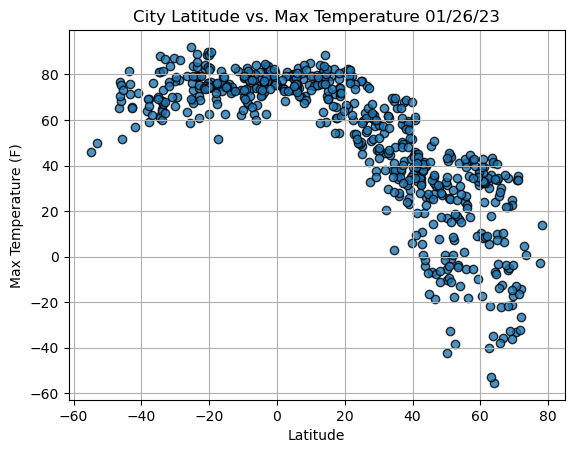

In [26]:
# Import the time module.

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))

plt.ylabel('Max Temperature (F)')

plt.xlabel('Latitude')

plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig1.png')

# Show plot.

plt.show()

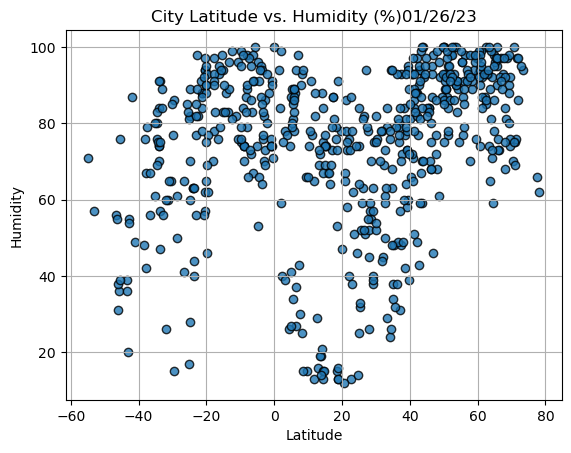

In [27]:
# Build the scatter plot for latitude vs humidity.

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           humidity,
           edgecolor='black', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Humidity (%)'+ time.strftime('%x'))

plt.ylabel('Humidity')

plt.xlabel('Latitude')

plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig2.png')

# Show plot.

plt.show()

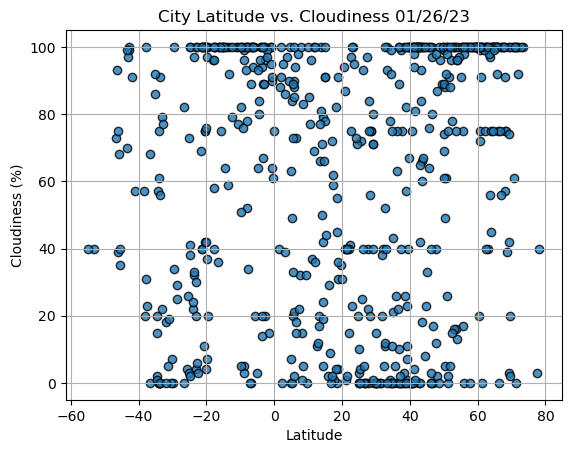

In [28]:
# Build the scatter plot for latitude vs cloudiness.

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Cloudiness '+ time.strftime('%x'))

plt.ylabel('Cloudiness (%)')

plt.xlabel('Latitude')

plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig3.png')

# Show plot.

plt.show()

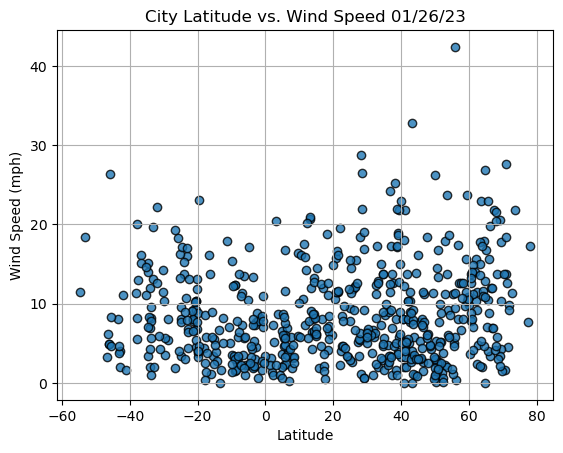

In [29]:
# Build the scatter plot for latitude vs wind speed.

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))

plt.ylabel('Wind Speed (mph)')

plt.xlabel('Latitude')

plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig4.png')

# Show plot.

plt.show()

In [39]:
# import dependencies

from scipy.stats import linregress

# Create a function to perform linear regression on the weather data.

# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    # Calculate the regression line "y_values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    # Create a scatter plot and splot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [40]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

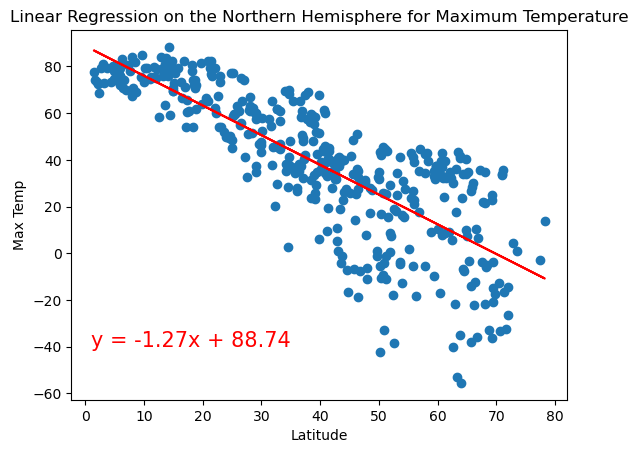

In [45]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Max Temp']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (1,-40))

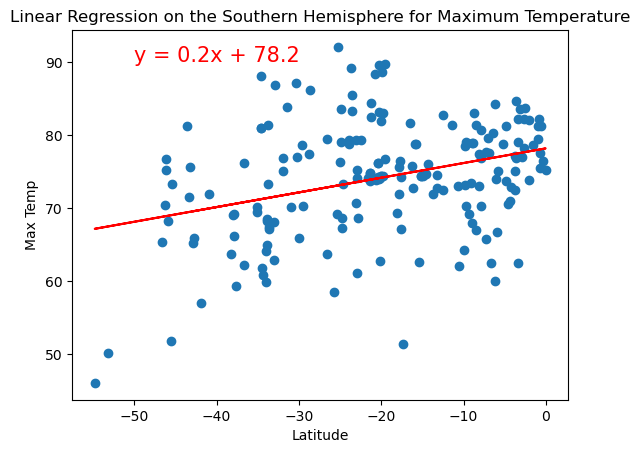

In [47]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Max Temp']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50,90))

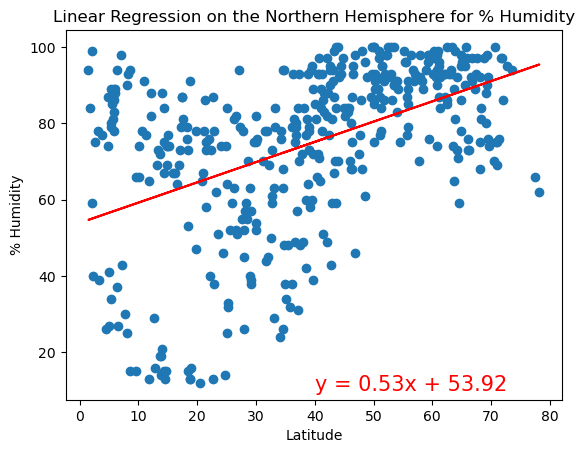

In [50]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Humidity']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (40,10))

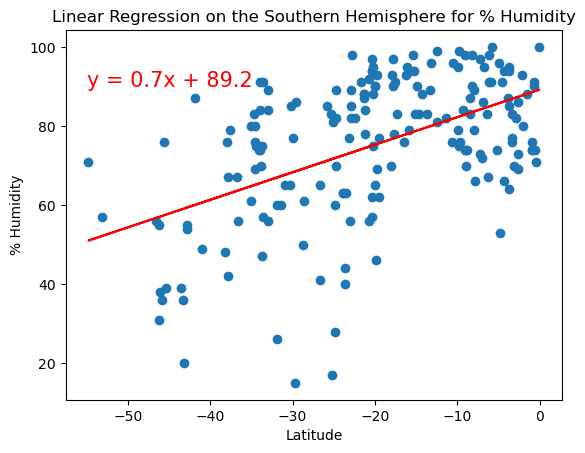

In [53]:
# Linear regression on the Northern Hemisphere

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Humidity']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-55,90))

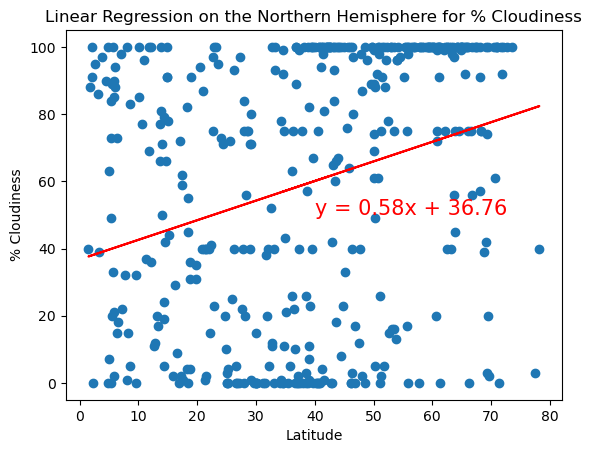

In [55]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Cloudiness']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (40,50))

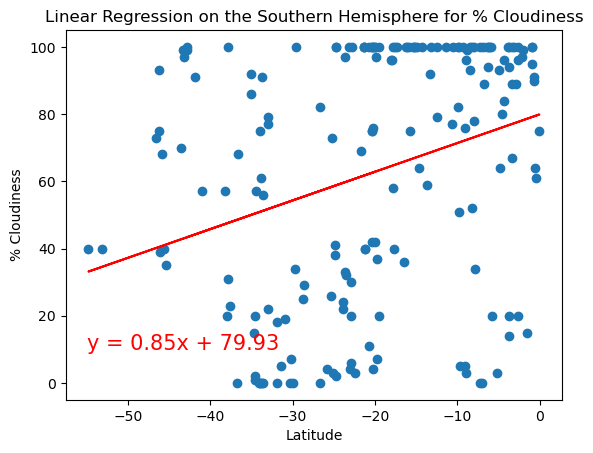

In [59]:
# Linear regression on the Northern Hemisphere

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Cloudiness']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-55,10))

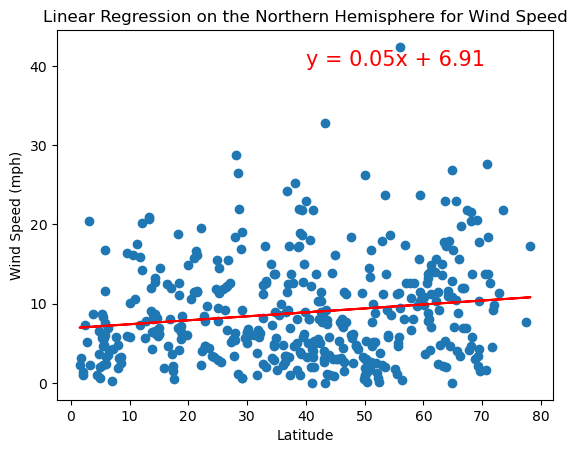

In [61]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Wind Speed']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (40,40))

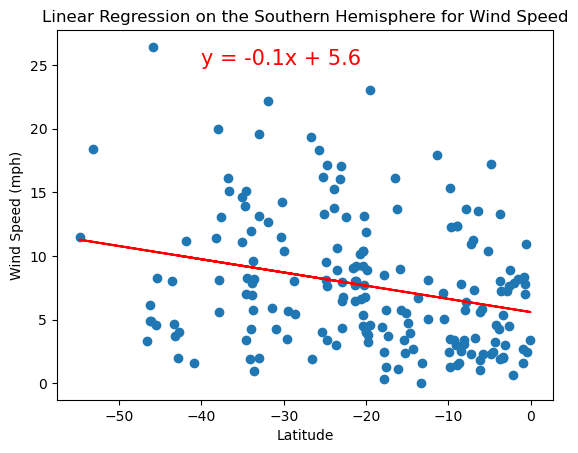

In [63]:
# Linear regression on the Northern Hemisphere

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Wind Speed']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)', (-40,25))